<a href="https://colab.research.google.com/github/JaledMC/Learning-Artificial-Vision/blob/master/Image_thresholding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image thresholding

Thresholds are used to recognice borders and edges. They must be applied in a gray image, and return a binary image that we can use as a mask for segmentation. 

When is difficult to find the threshold value, it is possible to make a previous analisys and adjust the ROI, removing the rest of the image, or apply other more complex algorithm like watershed on the unknow area.

If needed, install the libraries.

In [0]:
!apt-get -qq install -y libsm6 libxext6 && pip3 install -q -U opencv-python
!pip3 install -q matplotlib
!pip3 install -q numpy
!pip3 install -q requests

Import the libraries

In [0]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


## Download images

To use the github images, first download the image to local folder.


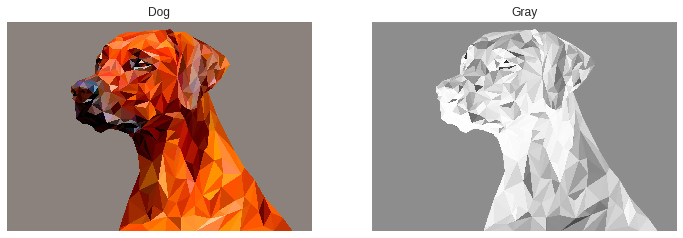

In [3]:
from PIL import Image
import requests
from io import BytesIO

response = requests.get('https://raw.githubusercontent.com/JaledMC/Learning-Artificial-Vision/master/images/dog.jpg')
img = Image.open(BytesIO(response.content))
img.save("dog.jpg")

image = cv2.imread('dog.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Represent the image
fig, axes = plt.subplots(1, 2, figsize=(12, 12))
axes[0].imshow(image)
axes[0].set_title('Dog')
axes[1].imshow(image_gray)
axes[1].set_title('Gray')
for ax in axes:
    ax.set_xticks([])
    ax.set_yticks([])

## Threshold methods

With binary image, we can select the threshold level, the output pixels value, or if we want an inverse mask.

In [0]:
# Params: image, threshold, outMaxValue, type. If only change one value side is desired, use 'TRUNC'or'TOZERO'
_, th1 = cv2.threshold(image_gray, 50, 200, cv2.THRESH_BINARY) 

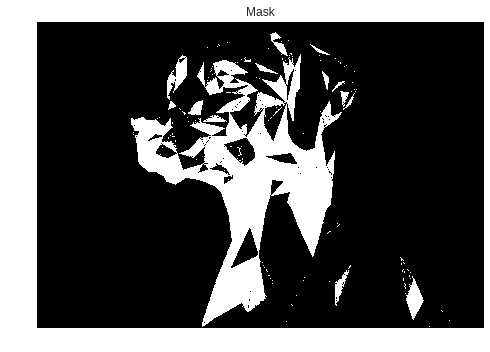

In [30]:
# Represent the image
fig, axes = plt.subplots(1, 1, figsize=(8, 8))
axes.imshow(th1)
axes.set_title('Mask')
plt.axis("off");

Binary thresholds don't work well for complex images when we want to identify edges. An adaptative thresholds can works better in that case.

In [0]:
# image, outMaxValue, type, binary finish, area size, multiply factor # TODO  CHANGE VALUE AREA 11
th2 = cv2.adaptiveThreshold(image_gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

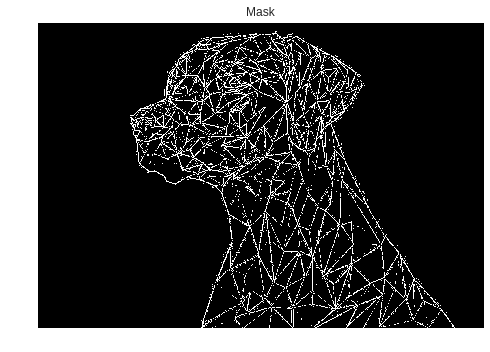

In [20]:
# Represent the image
fig, axes = plt.subplots(1, 1, figsize=(8, 8))
axes.imshow(th2)
axes.set_title('Mask')
plt.axis("off");

When we don't know the threshold value, Otsu filters finds a value for us. It uses the histogram to detect a value between spikes.

In [0]:
# image, threshold, outMaxValue, type. Otsu calculate threshold value, because of that we can put the value to 0
_, th3 = cv2.threshold(image_gray, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

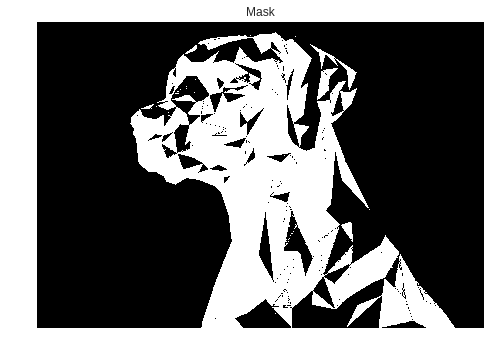

In [22]:
# Represent the image
fig, axes = plt.subplots(1, 1, figsize=(8, 8))
axes.imshow(th3)
axes.set_title('Mask')
plt.axis("off");

We can select the pixels between two values with in range for multilevel thresholding


In [0]:
mask2 = cv2.inRange(image_gray, 40, 90)

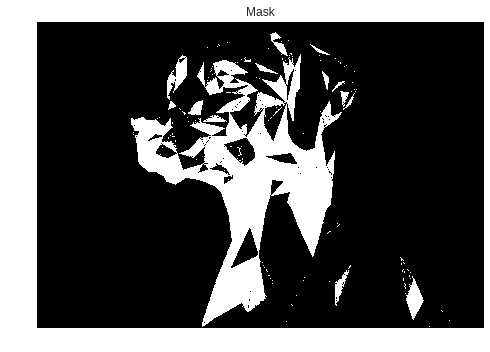

In [26]:
# Represent the image
fig, axes = plt.subplots(1, 1, figsize=(8, 8))
axes.imshow(th1)
axes.set_title('Mask')
plt.axis("off");

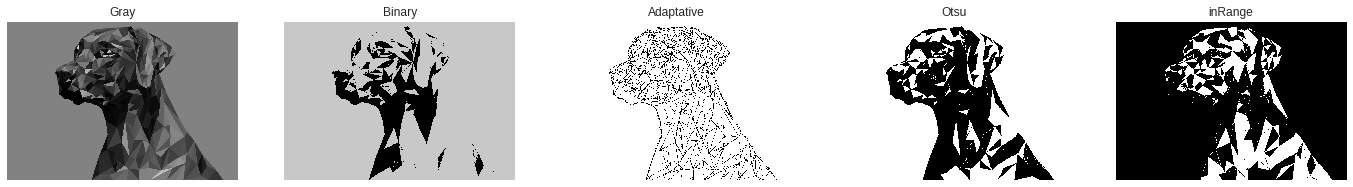

In [28]:
# imshow can only reproduce jpg. cmaping is needed for good visialization in other formats
fig, axes = plt.subplots(1, 5, figsize=(24, 16))
axes[0].imshow(image_gray, cmap='gray', vmin=0, vmax=255)
axes[0].set_title('Gray')
axes[1].imshow(th1, cmap='gray', vmin=0, vmax=255)
axes[1].set_title('Binary')
axes[2].imshow(th2, cmap='gray', vmin=0, vmax=255)
axes[2].set_title('Adaptative')
axes[3].imshow(th3, cmap='gray', vmin=0, vmax=255)
axes[3].set_title('Otsu')
axes[4].imshow(mask2, cmap='gray', vmin=0, vmax=255)
axes[4].set_title('inRange')

for ax in axes:
    ax.set_xticks([])
    ax.set_yticks([])